In [41]:
import json
import copy

with open('data/oral_paper_by_topic.json') as json_file:
    oral_papers = json.load(json_file)
with open('data/poster_demo_paper_by_topic.json') as json_file:
    poster_demo_papers = json.load(json_file)

# need to do this so that lists are copied correctly
all_papers = copy.deepcopy(oral_papers)
for k in poster_demo_papers:
    if k in all_papers:
        all_papers[k].extend(poster_demo_papers[k])
    else:
        all_papers[k] = poster_demo_papers[k]

oral_paper_titles = []
for lst in oral_papers.values():
    oral_paper_titles.extend(lst)
    
poster_paper_titles = []
for lst in poster_demo_papers.values():
    poster_paper_titles.extend(lst)
    
all_paper_titles = []
for lst in all_papers.values():
    all_paper_titles.extend(lst)

    
    
print("Number of oral papers: ", len(oral_paper_titles))
print("Number of poster papers: ", len(poster_paper_titles))
print("Total number of papers: ", len(all_paper_titles))

Number of oral papers:  220
Number of poster papers:  474
Total number of papers:  694


In [55]:
from collections import Counter
import re

counter = Counter()

for title in all_paper_titles:
    # this removes the (#4554) paper ID
    for word in title.split()[:-1]:
        for frag in re.split(r'\s|\'|,|;|:|\(|\)|\?|\!|\n', word.lower()):
            if len(frag) == 0: continue
            counter[frag] += 1

In [46]:
print(counter.most_common(40))
print(counter["low-resource"])
print(counter["multilingual"])
print(counter["cross-lingual"])


[('for', 319), ('and', 143), ('a', 140), ('with', 132), ('of', 104), ('in', 101), ('learning', 95), ('neural', 79), ('text', 70), ('the', 69), ('generation', 65), ('language', 57), ('to', 51), ('classification', 46), ('knowledge', 44), ('machine', 41), ('semantic', 41), ('translation', 38), ('using', 35), ('network', 35), ('model', 35), ('on', 33), ('extraction', 32), ('via', 32), ('word', 32), ('modeling', 31), ('from', 31), ('cross-lingual', 31), ('analysis', 30), ('entity', 29), ('question', 29), ('graph', 28), ('models', 27), ('networks', 27), ('attention', 26), ('representations', 26), ('sentiment', 26), ('parsing', 25), ('answering', 25), ('embeddings', 24)]
15
15
31


In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_deep_learning = [
    '', 'learning', 'network', 'neural', 'networks', 'deep', 'via', 'using',
    'text', 'language', 'model', 'models', 'based'
]

keywords = []
for w in counter.most_common():
    if w[0] not in stopwords.words('english') and w[0] not in stopwords_deep_learning:
        keywords.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
keywords[:10]

[('generation', 65),
 ('classification', 46),
 ('knowledge', 44),
 ('machine', 41),
 ('semantic', 41),
 ('translation', 38),
 ('extraction', 32),
 ('word', 32),
 ('modeling', 31),
 ('cross-lingual', 31)]

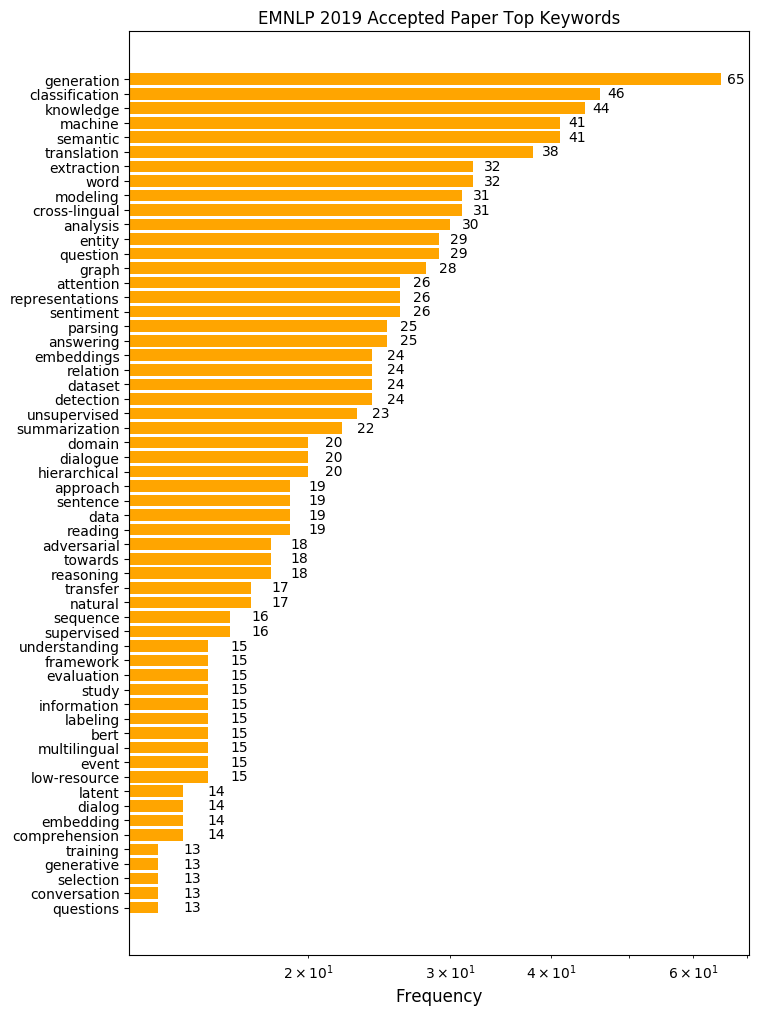

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

top_k = 58
key = [k[0] for k in keywords[:top_k]] 
value = [k[1] for k in keywords[:top_k]] 
y_pos = np.arange(len(key))

ax.barh(y_pos, value, align='center', color='orange', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 

for i, v in enumerate(value):
    ax.text(v + 1, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('EMNLP 2019 Accepted Paper Top Keywords', fontsize=12)

plt.show()

In [50]:
for title in all_paper_titles:
    if "generation" in title.lower():
        print(title)

Attending to Future Tokens for Bidirectional Sequence Generation (#1443)
Insertion-based Decoding with automatically Inferred Generation Order (#TACL-1732)
Implicit Deep Latent Variable Models for Text Generation (#161)
Judge the Judges: A Large-Scale Evaluation Study of Neural Language Models for Online Review Generation (#247)
Denoising-based Sequence-to-Sequence Pre-training for Text Generation (#592)
Enhancing Recurrent Variational Autoencoders with Mutual Information Estimation for Text Generation (#1060)
ARAML: A Stable Adversarial Training Framework for Text Generation (#2882)
FlowSeq: Non-Autoregressive Conditional Sequence Generation with Generative Flow (#2905)
Building Task-Oriented Visual Dialog Systems Through Alternative Optimization Between Dialog Policy and Language Generation (#3756)
Task-Oriented Conversation Generation Using Heterogeneous Memory Networks (#496)
Neural data-to-text generation: A comparison between pipeline and end-to-end architectures (#2586)
MoverSco

In [54]:
import stanfordnlp

lang = "en"
nlp = stanfordnlp.Pipeline(lang=lang)

doc = nlp("Deep Copycat Networks for Text-to-Text Generation")
for sent in doc.sentences:
    for w in sent.words:
        print("\t".join(map(str, [w.index, w.text, w.lemma, w.upos, w.xpos, w.feats, w.governor,
                                  w.dependency_relation, "_", "_"])))

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/stephen/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/Users/stephen/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/Users/stephen/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/stephen/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/Users/stephen/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/Users/stephen/stanfordnlp_resources/en_ew